In [1]:
from torchvision.datasets import ImageFolder

from torch.utils.data import DataLoader, SubsetRandomSampler
from torch.optim import SGD
import torch.nn as nn

import numpy as np

from config import *
from utils import test_augmentation, train_augmentation

In [2]:
# it is impossible change augmentations if ImageFolder split via random_split
train_data = ImageFolder(TRAIN_DATA, transform=train_augmentation)
valid_data = ImageFolder(TRAIN_DATA, transform=test_augmentation)

# obtain training indices
indices = np.arange(len(train_data))
np.random.shuffle(indices)
split = int(0.7 * len(train_data))
train_idx, valid_idx = indices[split:], indices[:split]

# prepare data loaders
train_loader = DataLoader(
	train_data, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(train_idx), num_workers=12
)
valid_loader = DataLoader(
	valid_data, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(valid_idx), num_workers=12
)

In [3]:
from engine import *

In [4]:
lr = 1e-3

model = get_model().cuda()
model.train()
optimizer = SGD(model.parameters(), lr, momentum=0.9,weight_decay=1e-4)
loss_function = nn.CrossEntropyLoss()

In [5]:
model.classes = train_data.classes

In [5]:
%%time
train_classification(
		1, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=100
	)

Train batch: 100 train loss: 3.8573, train accuracy: 0.1251
Train batch: 200 train loss: 3.5443, train accuracy: 0.1203
Train Epoch: 0 train loss: 3.4225, train accuracy: 0.1202  test accuracy: 0.1056
CPU times: user 1min 14s, sys: 21.5 s, total: 1min 36s
Wall time: 1min 38s


([3.422460177166742], [0.12016930437983073], [0.10561264822134422])

Train Epoch: 0 train loss: 2.6578, train accuracy: 0.1062  test accuracy: 0.0677
Train Epoch: 1 train loss: 2.4843, train accuracy: 0.1297  test accuracy: 0.1359
Train Epoch: 2 train loss: 2.4475, train accuracy: 0.1426  test accuracy: 0.1237
Train Epoch: 3 train loss: 2.3826, train accuracy: 0.1494  test accuracy: 0.1554
Train Epoch: 4 train loss: 2.3429, train accuracy: 0.1535  test accuracy: 0.1506
Train Epoch: 5 train loss: 2.3217, train accuracy: 0.1586  test accuracy: 0.1584
Train Epoch: 6 train loss: 2.2863, train accuracy: 0.1772  test accuracy: 0.1494
Train Epoch: 7 train loss: 2.2853, train accuracy: 0.163  test accuracy: 0.164
Train Epoch: 8 train loss: 2.3023, train accuracy: 0.1651  test accuracy: 0.1554
Train Epoch: 9 train loss: 2.2694, train accuracy: 0.1658  test accuracy: 0.1674
Train Epoch: 10 train loss: 2.2506, train accuracy: 0.1772  test accuracy: 0.1709
Train Epoch: 11 train loss: 2.2592, train accuracy: 0.1763  test accuracy: 0.1649
Train Epoch: 12 train loss: 

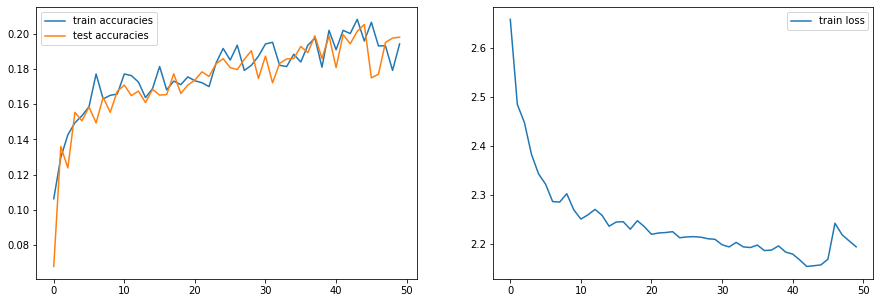

In [7]:
plot_result(
	*train_classification(
		50, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

In [8]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_50.model"))

Train Epoch: 0 train loss: 2.7018, train accuracy: 0.1196  test accuracy: 0.141
Train Epoch: 1 train loss: 2.5266, train accuracy: 0.1288  test accuracy: 0.1393
Train Epoch: 2 train loss: 2.4237, train accuracy: 0.1564  test accuracy: 0.1462
Train Epoch: 3 train loss: 2.3536, train accuracy: 0.1527  test accuracy: 0.1554
Train Epoch: 4 train loss: 2.3405, train accuracy: 0.1476  test accuracy: 0.1508
Train Epoch: 5 train loss: 2.3463, train accuracy: 0.1516  test accuracy: 0.1578
Train Epoch: 6 train loss: 2.2915, train accuracy: 0.1636  test accuracy: 0.1494
Train Epoch: 7 train loss: 2.2979, train accuracy: 0.1625  test accuracy: 0.162
Train Epoch: 8 train loss: 2.2727, train accuracy: 0.1656  test accuracy: 0.1642
Train Epoch: 9 train loss: 2.2831, train accuracy: 0.1627  test accuracy: 0.1524
Train Epoch: 10 train loss: 2.2548, train accuracy: 0.1711  test accuracy: 0.16
Train Epoch: 11 train loss: 2.2449, train accuracy: 0.1564  test accuracy: 0.1755
Train Epoch: 12 train loss: 2.

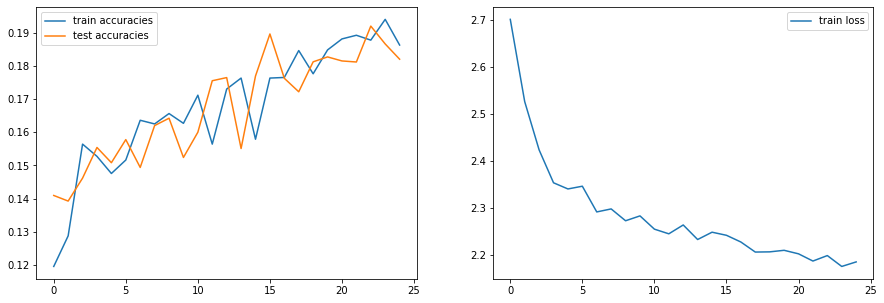

In [6]:
plot_result(
	*train_classification(
		25, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

In [7]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_125.model"))

Train Epoch: 0 train loss: 2.096, train accuracy: 0.24  test accuracy: 0.2567
Train Epoch: 1 train loss: 2.0939, train accuracy: 0.2455  test accuracy: 0.2606
Train Epoch: 2 train loss: 2.0828, train accuracy: 0.2407  test accuracy: 0.2604
Train Epoch: 3 train loss: 2.0733, train accuracy: 0.2473  test accuracy: 0.2478
Train Epoch: 4 train loss: 2.0625, train accuracy: 0.2514  test accuracy: 0.2473
Train Epoch: 5 train loss: 2.0506, train accuracy: 0.2621  test accuracy: 0.2669
Train Epoch: 6 train loss: 2.0352, train accuracy: 0.2554  test accuracy: 0.259
Train Epoch: 7 train loss: 2.0548, train accuracy: 0.2525  test accuracy: 0.253
Train Epoch: 8 train loss: 2.0471, train accuracy: 0.2448  test accuracy: 0.2496
Train Epoch: 9 train loss: 2.043, train accuracy: 0.2571  test accuracy: 0.2704
Train Epoch: 10 train loss: 2.0504, train accuracy: 0.2573  test accuracy: 0.2493
Train Epoch: 11 train loss: 2.0439, train accuracy: 0.2503  test accuracy: 0.2618
Train Epoch: 12 train loss: 2.02

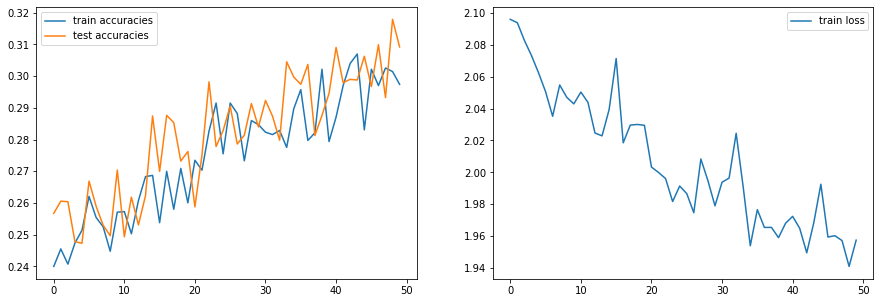

In [7]:
plot_result(
	*train_classification(
		50, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

In [8]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_200.model"))

Train Epoch: 0 train loss: 1.9647, train accuracy: 0.2939  test accuracy: 0.3005
Train Epoch: 1 train loss: 1.9343, train accuracy: 0.3128  test accuracy: 0.3026
Train Epoch: 2 train loss: 1.9519, train accuracy: 0.306  test accuracy: 0.3137
Train Epoch: 3 train loss: 1.9443, train accuracy: 0.304  test accuracy: 0.3016
Train Epoch: 4 train loss: 1.9176, train accuracy: 0.3182  test accuracy: 0.3202
Train Epoch: 5 train loss: 1.9114, train accuracy: 0.2974  test accuracy: 0.3073
Train Epoch: 6 train loss: 1.9272, train accuracy: 0.3178  test accuracy: 0.324
Train Epoch: 7 train loss: 1.9021, train accuracy: 0.3235  test accuracy: 0.3277
Train Epoch: 8 train loss: 1.9191, train accuracy: 0.3136  test accuracy: 0.3248
Train Epoch: 9 train loss: 1.9279, train accuracy: 0.3103  test accuracy: 0.3091
Train Epoch: 10 train loss: 1.9011, train accuracy: 0.3261  test accuracy: 0.3146
Train Epoch: 11 train loss: 1.8809, train accuracy: 0.3287  test accuracy: 0.3238
Train Epoch: 12 train loss: 1

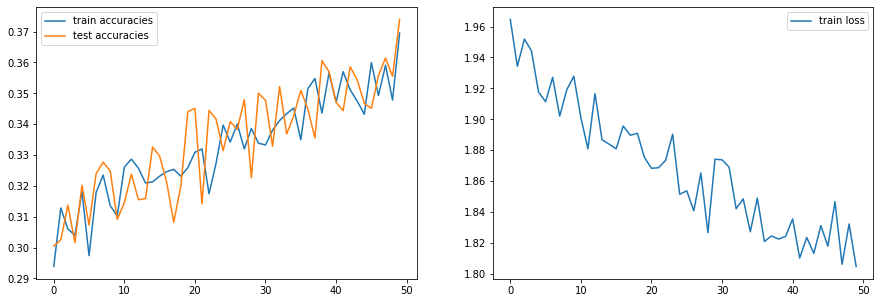

In [9]:
plot_result(
	*train_classification(
		50, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

In [10]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_250.model"))

In [11]:
plot_result(
	*train_classification(
		50, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

Train Epoch: 0 train loss: 1.7945, train accuracy: 0.3644  test accuracy: 0.3695
Train Epoch: 1 train loss: 1.8172, train accuracy: 0.3712  test accuracy: 0.3662
Train Epoch: 2 train loss: 1.7789, train accuracy: 0.3666  test accuracy: 0.3711
Train Epoch: 3 train loss: 1.8159, train accuracy: 0.3577  test accuracy: 0.3631
Train Epoch: 4 train loss: 1.7883, train accuracy: 0.3669  test accuracy: 0.3457
Train Epoch: 5 train loss: 1.7943, train accuracy: 0.3497  test accuracy: 0.3513
Train Epoch: 6 train loss: 1.7714, train accuracy: 0.3607  test accuracy: 0.3538
Train Epoch: 7 train loss: 1.7711, train accuracy: 0.3625  test accuracy: 0.3641
Train Epoch: 8 train loss: 1.7788, train accuracy: 0.3662  test accuracy: 0.3875
Train Epoch: 9 train loss: 1.7415, train accuracy: 0.3809  test accuracy: 0.3518


KeyboardInterrupt: 

In [12]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_260.model"))

In [ ]:
plot_result(
	*train_classification(
		100, model, train_loader, valid_loader, loss_function, optimizer, noti_rate=len(train_data) + 1
	)
)

In [ ]:
torch.save(model, os.path.join(WEIGHT_PATH, "classification_400.model"))